First we are importing the required libraries

In [403]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle

Importing our Dataset from the given github link into Data Frame

In [348]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [349]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [350]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no Null values in the Dataset

In [351]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

The Data Types are either of Object or Integer. So we are converting the Object Data Types to Integer Numeric values by using Label Encoder

In [352]:
le=sklearn.preprocessing.LabelEncoder()

In [353]:
for c in df.select_dtypes(include="object").columns:
    df[c]=le.fit_transform(df[c].astype(str))

In [354]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [355]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

Now all the columns are of Integer Data Type. And we are going to check the Corelations between the Features of our Dataset.

In [356]:
dfcor=df.corr()
dfcor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


We can better understand the above corelations of our Dataset Features by using the Heatmap graphical representation as below

<AxesSubplot:>

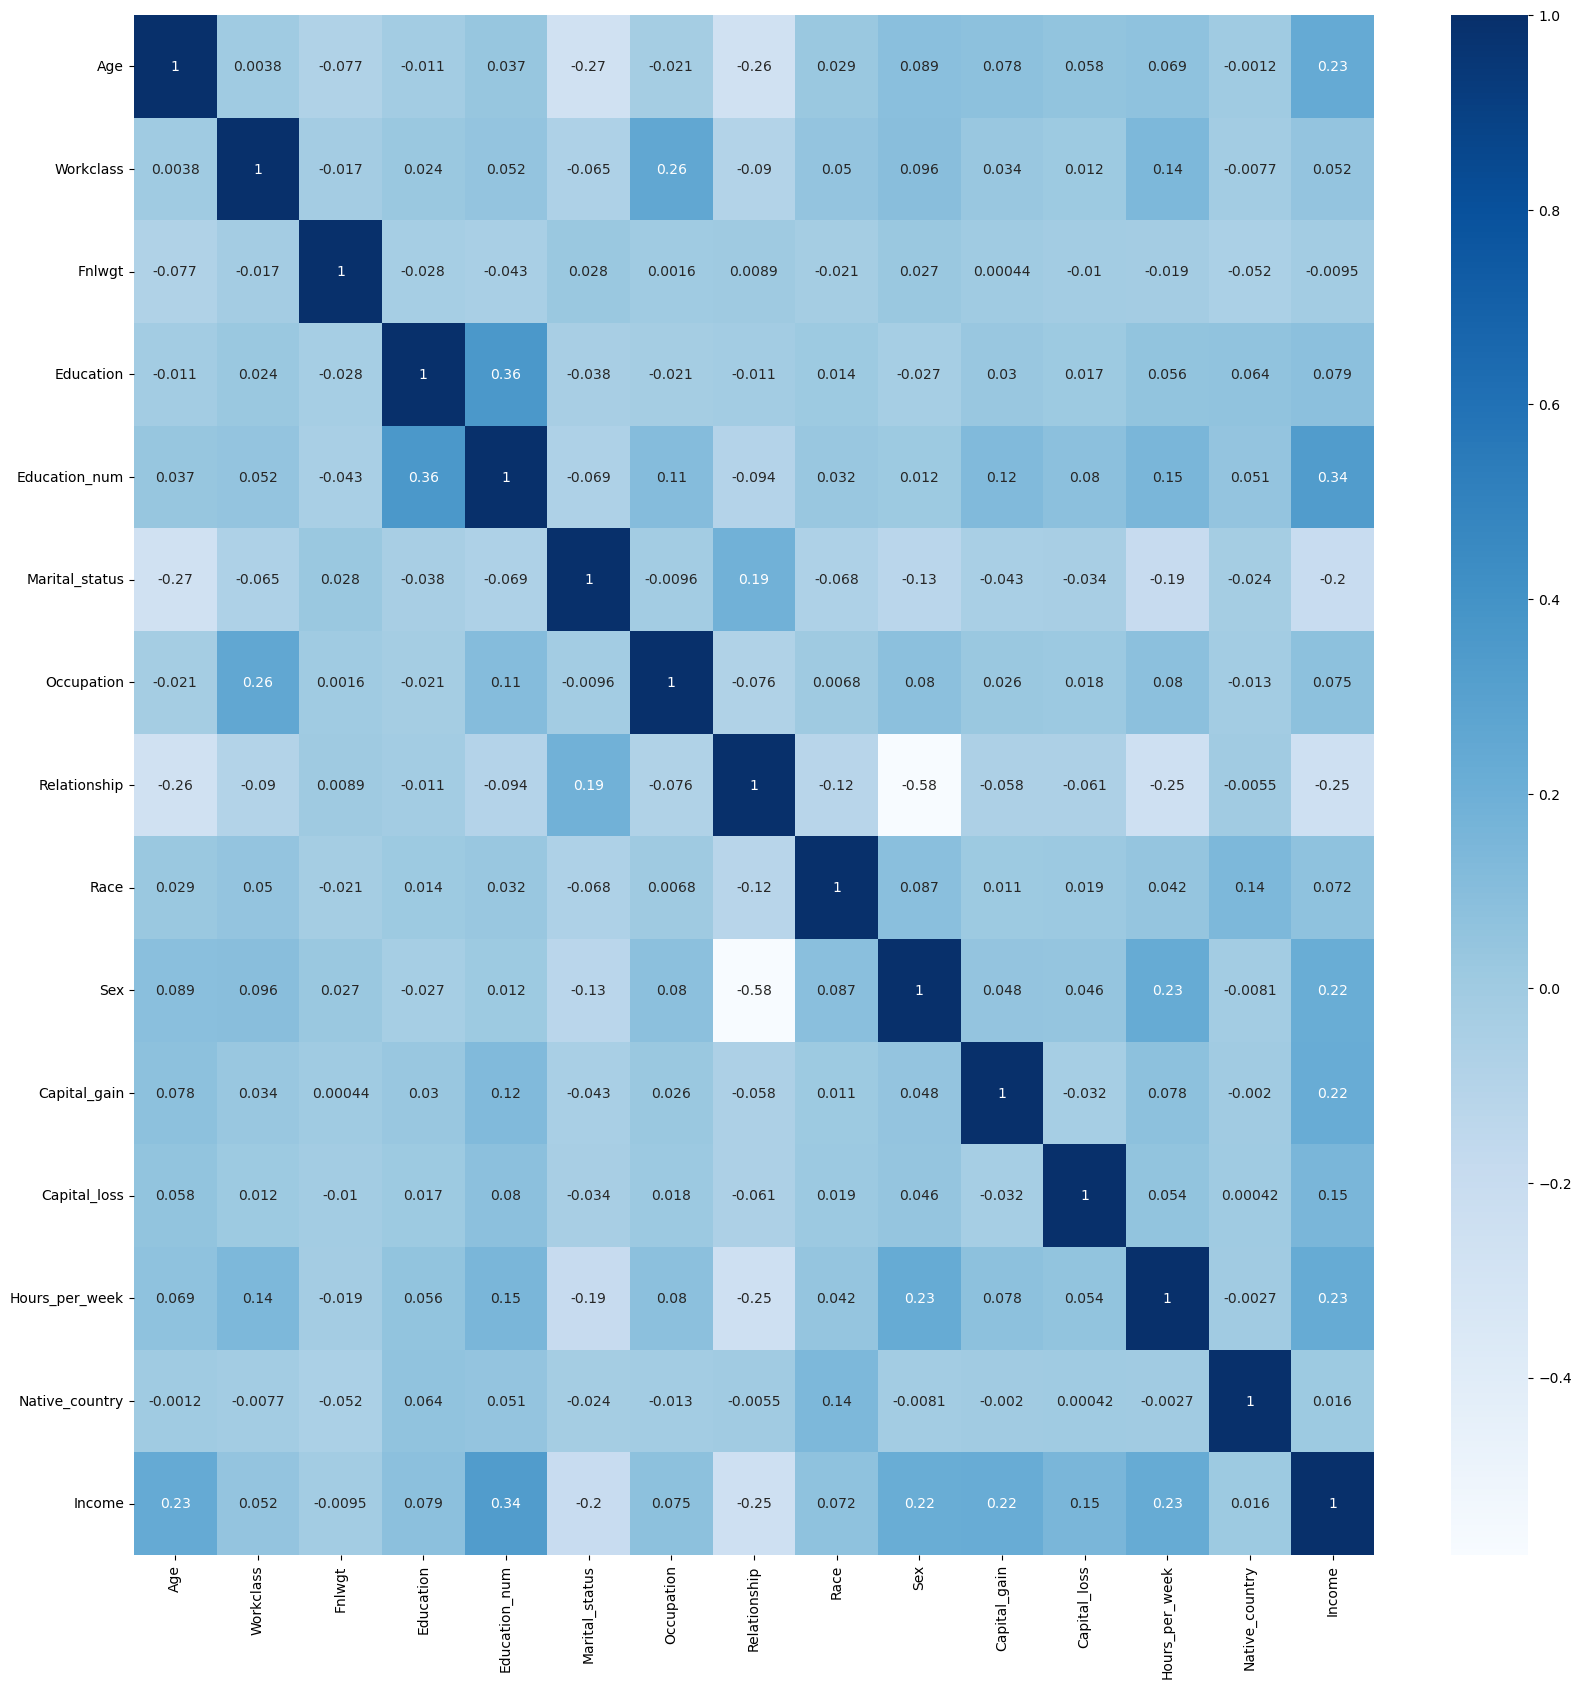

In [357]:
plt.figure(figsize=(20,20))
sns.heatmap(dfcor,annot=True,cmap='Blues')

As per above Heatmap, we are observing that the Final Weight (Fnlwgt) is very less corelated with our target variable "Income" with on -0.0095 Negative corelation. So as we think, we are going to drop this columns

In [358]:
df.drop('Fnlwgt',axis=1,inplace=True)

In [359]:
df.shape

(32560, 14)

Age                  AxesSubplot(0.125,0.53;0.0945122x0.35)
Workclass         AxesSubplot(0.238415,0.53;0.0945122x0.35)
Education         AxesSubplot(0.351829,0.53;0.0945122x0.35)
Education_num     AxesSubplot(0.465244,0.53;0.0945122x0.35)
Marital_status    AxesSubplot(0.578659,0.53;0.0945122x0.35)
Occupation        AxesSubplot(0.692073,0.53;0.0945122x0.35)
Relationship      AxesSubplot(0.805488,0.53;0.0945122x0.35)
Race                 AxesSubplot(0.125,0.11;0.0945122x0.35)
Sex               AxesSubplot(0.238415,0.11;0.0945122x0.35)
Capital_gain      AxesSubplot(0.351829,0.11;0.0945122x0.35)
Capital_loss      AxesSubplot(0.465244,0.11;0.0945122x0.35)
Hours_per_week    AxesSubplot(0.578659,0.11;0.0945122x0.35)
Native_country    AxesSubplot(0.692073,0.11;0.0945122x0.35)
Income            AxesSubplot(0.805488,0.11;0.0945122x0.35)
dtype: object

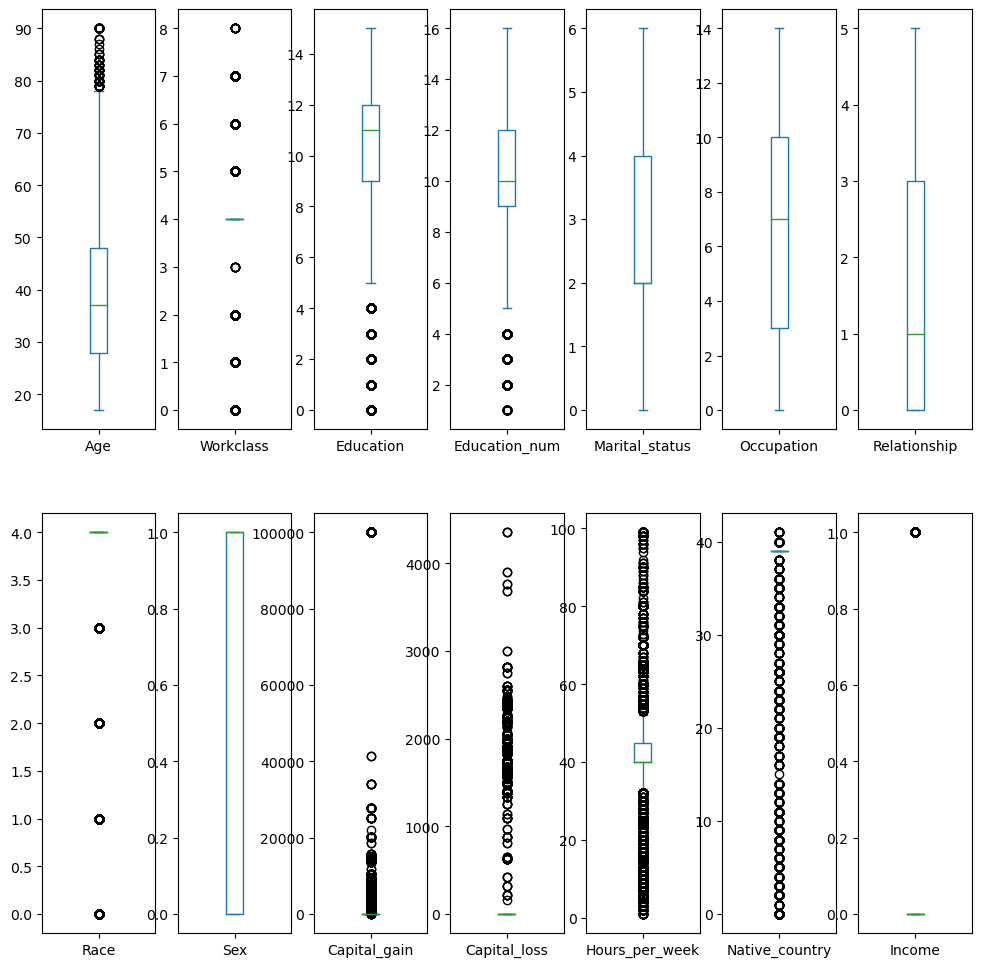

In [360]:
df.plot(kind='box',figsize=(12,12),layout=(2,7),subplots=True)

In [361]:
df.skew()

Age                0.558738
Workclass         -0.752280
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

By using above Boxplots and Skewness, we found Outliers and Skewness in many columns, especially in Capital Gain/Loss, Race & Native Country etc.

We are checking the same by Displots also and trying to overcome by using Boxcox method.

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

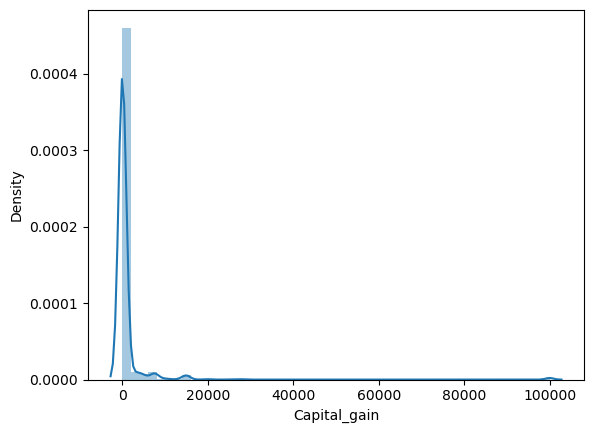

In [362]:
sns.distplot(df['Capital_gain'])

In [363]:
df['Capital_gain']=boxcox(df['Capital_gain'],0.5)

In [364]:
df['Capital_gain']=boxcox(df['Capital_gain'],0.5)

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

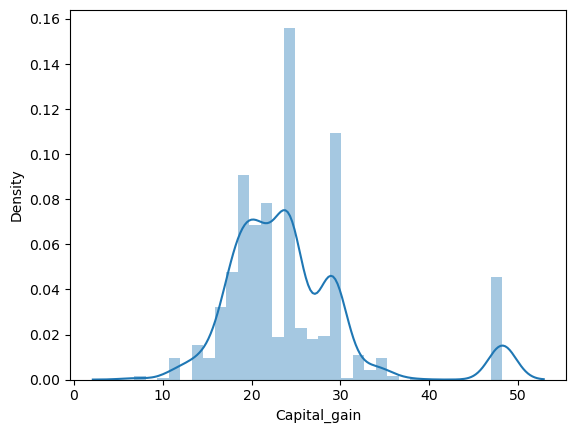

In [365]:
sns.distplot(df['Capital_gain'])

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

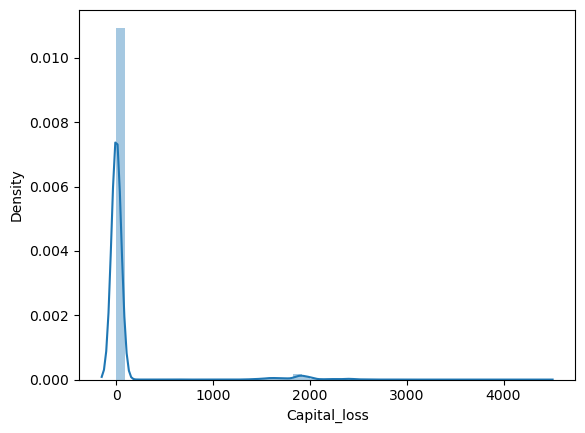

In [366]:
sns.distplot(df['Capital_loss'])

In [367]:
df['Capital_loss']=boxcox(df['Capital_loss'],0.5)

In [368]:
df['Capital_loss']=boxcox(df['Capital_loss'],0.5)

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

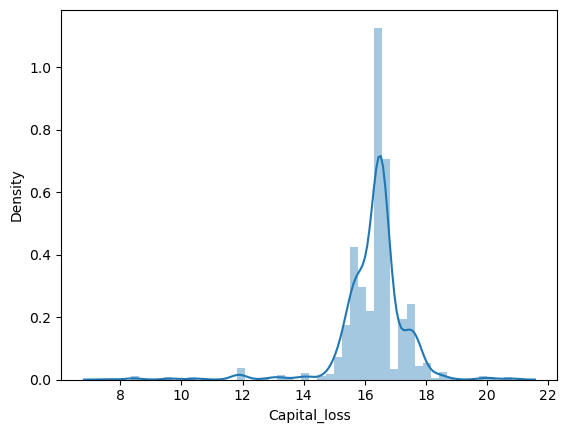

In [369]:
sns.distplot(df['Capital_loss'])

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

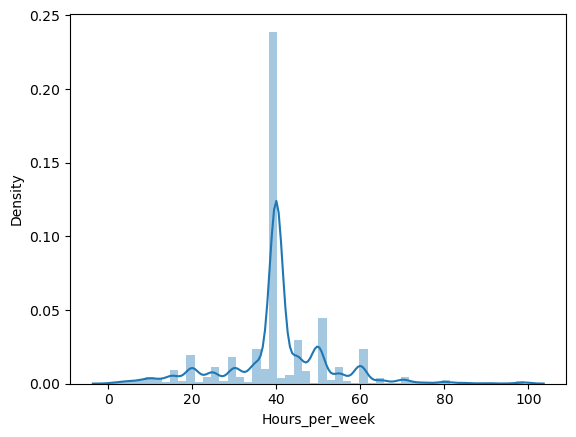

In [370]:
sns.distplot(df['Hours_per_week'])

In [371]:
df['Hours_per_week']=boxcox(df['Hours_per_week'],0.5)

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

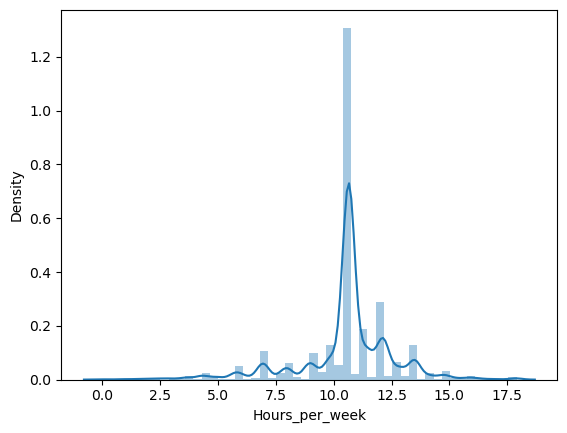

In [372]:
sns.distplot(df['Hours_per_week'])

We are also observing that the "Native_country" has a very less corelation with our target variable "Income" with only 0.016 Positive corelation value. So as per our opinion this Feature should also be droped.

In [373]:
df.drop('Native_country',axis=1,inplace=True)

In [374]:
df.skew()

Age               0.558738
Workclass        -0.752280
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      1.654327
Capital_loss     -2.478362
Hours_per_week   -0.984894
Income            1.212383
dtype: float64

Age                  AxesSubplot(0.125,0.53;0.0945122x0.35)
Workclass         AxesSubplot(0.238415,0.53;0.0945122x0.35)
Education         AxesSubplot(0.351829,0.53;0.0945122x0.35)
Education_num     AxesSubplot(0.465244,0.53;0.0945122x0.35)
Marital_status    AxesSubplot(0.578659,0.53;0.0945122x0.35)
Occupation        AxesSubplot(0.692073,0.53;0.0945122x0.35)
Relationship      AxesSubplot(0.805488,0.53;0.0945122x0.35)
Race                 AxesSubplot(0.125,0.11;0.0945122x0.35)
Sex               AxesSubplot(0.238415,0.11;0.0945122x0.35)
Capital_gain      AxesSubplot(0.351829,0.11;0.0945122x0.35)
Capital_loss      AxesSubplot(0.465244,0.11;0.0945122x0.35)
Hours_per_week    AxesSubplot(0.578659,0.11;0.0945122x0.35)
Income            AxesSubplot(0.692073,0.11;0.0945122x0.35)
dtype: object

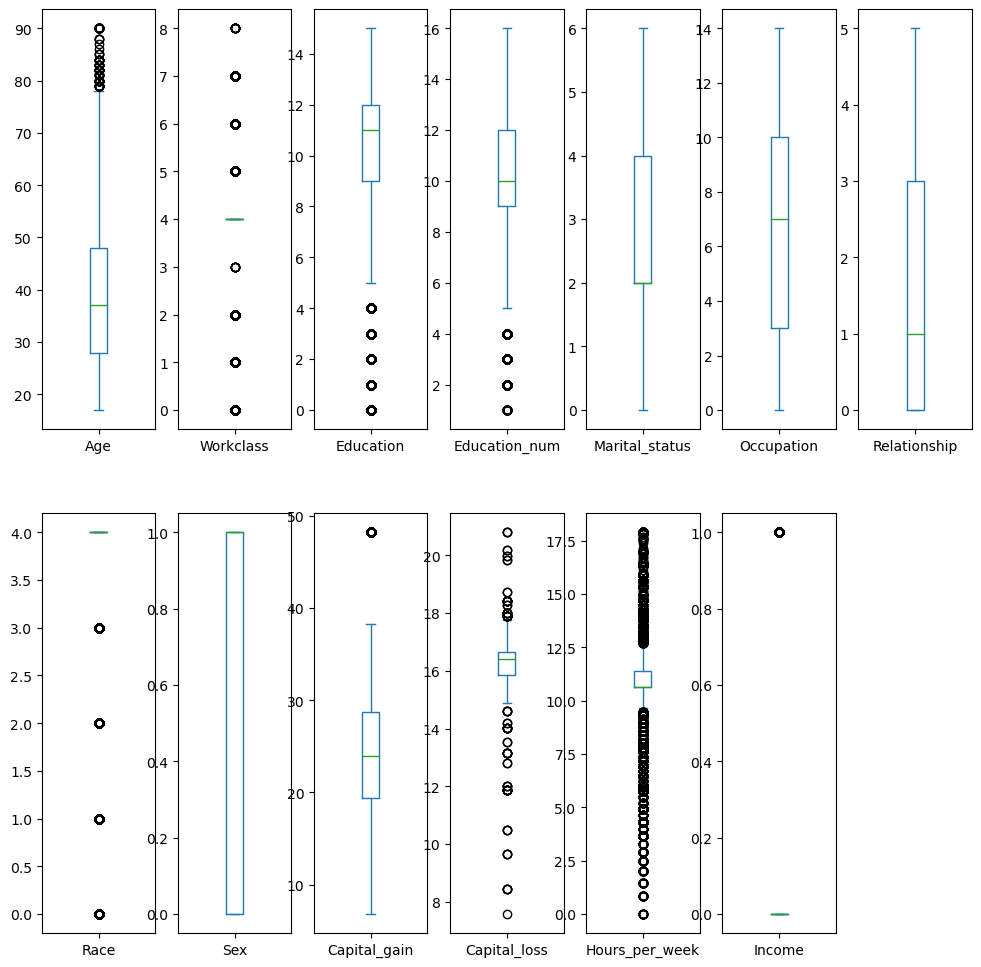

In [375]:
df.plot(kind='box',figsize=(12,12),layout=(2,7),subplots=True)

By using above boxcox methods, we have reduced the skewness & outliers to our best possible level. So now we are again checking for the NaN values, if there any created by the above process

In [376]:
df.isna().sum()

Age                   0
Workclass             0
Education             0
Education_num         0
Marital_status        0
Occupation            0
Relationship          0
Race                  0
Sex                   0
Capital_gain      29849
Capital_loss      31041
Hours_per_week        0
Income                0
dtype: int64

The Capital gain/loss got the NaN values again, so we are replacing the same with the respective Mean values

In [377]:
df=df.fillna(df.mean())

In [378]:
z=np.abs(zscore(df))
z

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,0.837097,1.463883,0.335443,1.134779,0.406183,0.608434,0.900177,0.393675,0.703087,1.635185e-15,0.0,2.530255,0.563210
1,0.042640,0.090121,0.181319,0.420027,1.734026,0.135480,0.277810,0.393675,0.703087,1.635185e-15,0.0,0.050672,0.563210
2,1.057031,0.090121,2.402489,1.197429,0.406183,0.135480,0.900177,1.962583,0.703087,1.635185e-15,0.0,0.050672,0.563210
3,0.775755,0.090121,0.335443,1.134779,0.406183,0.810427,2.211658,1.962583,1.422298,1.635185e-15,0.0,0.050672,0.563210
4,0.115952,0.090121,0.439700,1.523480,0.406183,0.608434,2.211658,0.393675,1.422298,1.635185e-15,0.0,0.050672,0.563210
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.849066,0.090121,0.852204,0.746077,0.406183,1.519858,2.211658,0.393675,1.422298,1.635185e-15,0.0,0.101337,0.563210
32556,0.103982,0.090121,0.181319,0.420027,0.406183,0.100997,0.900177,0.393675,0.703087,1.635185e-15,0.0,0.050672,1.775537
32557,1.423589,0.090121,0.181319,0.420027,2.249503,1.317864,1.589291,0.393675,1.422298,1.635185e-15,0.0,0.050672,0.563210
32558,1.215624,0.090121,0.181319,0.420027,0.921660,1.317864,0.966924,0.393675,0.703087,1.635185e-15,0.0,1.707678,0.563210


In [379]:
cleaned_df=df[(z<3).all(axis=1)]
cleaned_df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,6,9,13,2,4,0,4,1,24.381816,16.300054,5.211103,0
1,38,4,11,9,0,6,1,4,1,24.381816,16.300054,10.649111,0
2,53,4,1,7,2,6,0,2,1,24.381816,16.300054,10.649111,0
3,28,4,9,13,2,10,5,2,0,24.381816,16.300054,10.649111,0
4,37,4,12,14,2,4,5,4,0,24.381816,16.300054,10.649111,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,7,12,2,13,5,4,0,24.381816,16.300054,10.328828,0
32556,40,4,11,9,2,7,0,4,1,24.381816,16.300054,10.649111,1
32557,58,4,11,9,6,1,4,4,0,24.381816,16.300054,10.649111,0
32558,22,4,11,9,4,1,3,4,1,24.381816,16.300054,6.944272,0


In [380]:
df.shape

(32560, 13)

In [381]:
cleaned_df.shape

(29416, 13)

After cleaning our dataset, we have lost only 9.66% data approximately

Now we are going to separate our Independent & Target variables and apply different Classification Algorithms on the same

In [383]:
x=cleaned_df.iloc[:,0:-1]

In [384]:
y=cleaned_df.iloc[:,-1]

In [385]:
x.shape

(29416, 12)

In [386]:
y.shape

(29416,)

In [387]:
lg=LogisticRegression()

In [388]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    lg.fit(xtrain,ytrain)
    pred1=lg.predict(xtest)
    ascore=accuracy_score(ytest,pred1)
    print(ascore)

0.8021529745042493
0.80328611898017
0.8018130311614731
0.8020396600566573
0.8027195467422096
0.8088385269121813
0.8090651558073655
0.8097450424929179
0.8018130311614731
0.8012464589235128
0.8125779036827195
0.8039660056657224
0.8038526912181303
0.8041926345609065
0.8090651558073655
0.8078186968838527
0.8064589235127478
0.8028328611898017
0.8044192634560906
0.8021529745042493
0.8036260623229462
0.806798866855524
0.8098583569405099
0.8016997167138811
0.8028328611898017
0.8088385269121813
0.8035127478753541
0.8009065155807366
0.8123512747875354
0.8092917847025496
0.8135977337110482
0.79671388101983
0.8011331444759207
0.8004532577903682
0.8011331444759207
0.8079320113314448
0.8086118980169972
0.8053257790368272
0.8026062322946176
0.8155240793201133
0.8103116147308782
0.8046458923512748
0.8109915014164306
0.8079320113314448
0.8045325779036827
0.8063456090651558
0.8046458923512748
0.806798866855524
0.8089518413597734
0.8044192634560906


In [389]:
dt=DecisionTreeClassifier()

In [390]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    dt.fit(xtrain,ytrain)
    pred2=dt.predict(xtest)
    ascore=accuracy_score(ytest,pred2)
    print(ascore)

0.819943342776204
0.8143909348441927
0.8194900849858356
0.8115580736543909
0.8147308781869689
0.8120113314447592
0.8137110481586403
0.8122379603399433
0.8071388101983002
0.8141643059490085
0.8106515580736544
0.8147308781869689
0.8140509915014165
0.8126912181303116
0.8124645892351274
0.811784702549575
0.8192634560906515
0.8158640226628895
0.8154107648725213
0.8118980169971671
0.8156373937677054
0.8060056657223796
0.8137110481586403
0.8160906515580737
0.813371104815864
0.8088385269121813
0.8184702549575071
0.8138243626062323
0.8092917847025496
0.8118980169971671
0.8130311614730878
0.8169971671388102
0.8064589235127478
0.8148441926345609
0.804985835694051
0.8090651558073655
0.8184702549575071
0.8176770538243626
0.8155240793201133
0.811671388101983
0.8083852691218131
0.8074787535410765
0.813484419263456
0.8171104815864023
0.8095184135977337
0.8190368271954674
0.8155240793201133
0.8163172804532578
0.8147308781869689
0.811784702549575


In [391]:
rf=RandomForestClassifier()

In [392]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    rf.fit(xtrain,ytrain)
    pred3=rf.predict(xtest)
    ascore=accuracy_score(ytest,pred3)
    print(ascore)

0.8492917847025496
0.8409065155807366
0.8457790368271955
0.8411331444759207
0.8401133144475921
0.843399433427762
0.8454390934844193
0.8413597733711048
0.8387535410764873
0.8414730878186969
0.8444192634560906
0.8438526912181303
0.8404532577903683
0.8488385269121813
0.8440793201133144
0.8421529745042493
0.8446458923512747
0.843399433427762
0.8474787535410765
0.8413597733711048
0.841699716713881
0.8402266288951842
0.8487252124645892
0.8430594900849858
0.8460056657223796
0.8379603399433427
0.8388668555240794
0.8403399433427762
0.84657223796034
0.8462322946175638
0.8440793201133144
0.8372804532577903
0.8385269121813032
0.8431728045325779
0.8467988668555241
0.8420396600566572
0.8487252124645892
0.8443059490084985
0.845099150141643
0.8456657223796034
0.8475920679886686
0.8453257790368272
0.8480453257790368
0.8477053824362606
0.8423796033994334
0.850084985835694
0.8491784702549575
0.8460056657223796
0.8427195467422096
0.8439660056657223


In [393]:
kn=KNeighborsClassifier()

In [394]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    kn.fit(xtrain,ytrain)
    pred4=kn.predict(xtest)
    ascore=accuracy_score(ytest,pred4)
    print(ascore)

0.8159773371104816
0.8046458923512748
0.8126912181303116
0.7997733711048158
0.8077053824362607
0.8126912181303116
0.8142776203966006
0.8086118980169972
0.8086118980169972
0.8070254957507083
0.8125779036827195
0.8038526912181303
0.8111048158640226
0.813484419263456
0.8115580736543909
0.8096317280453258
0.8079320113314448
0.8106515580736544
0.8107648725212464
0.8045325779036827
0.8092917847025496
0.8090651558073655
0.816657223796034
0.8126912181303116
0.8095184135977337
0.8143909348441927
0.8069121813031161
0.8122379603399433
0.8118980169971671
0.8125779036827195
0.8108781869688385
0.8057790368271954
0.8097450424929179
0.8143909348441927
0.8087252124645893
0.8075920679886686
0.8130311614730878
0.8077053824362607
0.8074787535410765
0.8148441926345609
0.8098583569405099
0.8130311614730878
0.8137110481586403
0.8131444759206798
0.8053257790368272
0.8118980169971671
0.8115580736543909
0.8125779036827195
0.8126912181303116
0.808271954674221


In [395]:
rg=RidgeClassifier()

In [396]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    rg.fit(xtrain,ytrain)
    pred5=rg.predict(xtest)
    ascore=accuracy_score(ytest,pred5)
    print(ascore)

0.806685552407932
0.8084985835694051
0.80328611898017
0.8061189801699716
0.8071388101983002
0.8121246458923512
0.8105382436260623
0.8142776203966006
0.8038526912181303
0.8088385269121813
0.8115580736543909
0.8061189801699716
0.8081586402266289
0.8080453257790369
0.8154107648725213
0.8098583569405099
0.8074787535410765
0.8069121813031161
0.8081586402266289
0.8043059490084986
0.806685552407932
0.8071388101983002
0.8121246458923512
0.8077053824362607
0.8091784702549575
0.8096317280453258
0.809971671388102
0.8036260623229462
0.816657223796034
0.8131444759206798
0.8174504249291785
0.8019263456090652
0.8009065155807366
0.8020396600566573
0.8064589235127478
0.8113314447592068
0.8154107648725213
0.8088385269121813
0.8060056657223796
0.8168838526912181
0.8094050991501417
0.8111048158640226
0.8138243626062323
0.809971671388102
0.8087252124645893
0.8108781869688385
0.8115580736543909
0.8096317280453258
0.8111048158640226
0.8084985835694051


In [397]:
sg=SGDClassifier()

In [398]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    sg.fit(xtrain,ytrain)
    pred6=sg.predict(xtest)
    ascore=accuracy_score(ytest,pred6)
    print(ascore)

0.7985269121813031
0.7313314447592068
0.7798300283286119
0.7952407932011332
0.7840226628895184
0.7636260623229462
0.7237393767705382
0.7992067988668555
0.6997167138810199
0.7288385269121813
0.8028328611898017
0.80328611898017
0.7731444759206799
0.781529745042493
0.6541643059490085
0.8113314447592068
0.80328611898017
0.7604532577903683
0.7034560906515581
0.6687818696883853
0.7335977337110482
0.7875354107648725
0.7830028328611898
0.7876487252124645
0.8036260623229462
0.8084985835694051
0.6705949008498584
0.6044192634560906
0.684985835694051
0.4881586402266289
0.7601133144475921
0.8028328611898017
0.4453257790368272
0.7697450424929179
0.8045325779036827
0.8113314447592068
0.5278186968838527
0.7895750708215298
0.7993201133144476
0.7700849858356941
0.780056657223796
0.8103116147308782
0.7644192634560907
0.7633994334277621
0.806798866855524
0.6396600566572238
0.809971671388102
0.8126912181303116
0.7609065155807365
0.80328611898017


In [399]:
br=BernoulliNB()

In [400]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    br.fit(xtrain,ytrain)
    pred7=br.predict(xtest)
    ascore=accuracy_score(ytest,pred7)
    print(ascore)

0.7267988668555241
0.7269121813031162
0.744929178470255
0.7279320113314448
0.7257790368271955
0.7341643059490085
0.7295184135977337
0.7358640226628895
0.7281586402266289
0.7348441926345609
0.7322379603399434
0.7288385269121813
0.735070821529745
0.7424362606232294
0.7337110481586402
0.7303116147308781
0.7280453257790368
0.7363172804532578
0.7352974504249292
0.7355240793201133
0.7345042492917847
0.728271954674221
0.7454957507082153
0.7347308781869688
0.7347308781869688
0.7331444759206799
0.7289518413597734
0.7348441926345609
0.7358640226628895
0.7274787535410765
0.7360906515580736
0.7271388101983003
0.7324645892351275
0.7331444759206799
0.7318980169971672
0.7301983002832861
0.7195467422096318
0.7314447592067989
0.7284985835694051
0.7343909348441926
0.736770538243626
0.7303116147308781
0.7347308781869688
0.7376770538243627
0.7275920679886686
0.7365439093484419
0.7360906515580736
0.7351841359773371
0.7299716713881019
0.7280453257790368


In [401]:
gn=GaussianNB()

In [402]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    gn.fit(xtrain,ytrain)
    pred8=gn.predict(xtest)
    ascore=accuracy_score(ytest,pred8)
    print(ascore)

0.7792634560906515
0.7807365439093484
0.7943342776203967
0.7830028328611898
0.7772237960339944
0.7907082152974504
0.7826628895184136
0.7861756373937677
0.781643059490085
0.7805099150141643
0.7845892351274788
0.7844759206798867
0.7851558073654391
0.7908215297450425
0.7877620396600566
0.7887818696883853
0.7853824362606232
0.7844759206798867
0.7857223796033994
0.7896883852691218
0.781643059490085
0.7820963172804533
0.793314447592068
0.7840226628895184
0.786742209631728
0.7831161473087819
0.7828895184135978
0.7840226628895184
0.7852691218130312
0.7848158640226629
0.7870821529745042
0.7752974504249291
0.7848158640226629
0.7896883852691218
0.7819830028328612
0.7884419263456091
0.7788101983002833
0.7858356940509915
0.781529745042493
0.7884419263456091
0.7905949008498584
0.7825495750708216
0.7876487252124645
0.79342776203966
0.7837960339943343
0.7854957507082153
0.7780169971671388
0.7884419263456091
0.7785835694050991
0.7814164305949008


By using above Algos, we found the best Algo as Random Forest Classifier. So going to check the different Cross Validations on Random Forest Classifier for more accurate results.

In [404]:
cv1=cross_val_score(rf,x,y,cv=KFold(n_splits=10))

In [405]:
cv1

array([0.83412644, 0.84772264, 0.84568321, 0.83514616, 0.85146159,
       0.83684568, 0.8483509 , 0.85175111, 0.85651139, 0.84359062])

In [406]:
cv1.mean()

0.8451189736238016

In [407]:
cv2=cross_val_score(rf,x,y,cv=StratifiedKFold(n_splits=10))

In [408]:
cv2

array([0.83752549, 0.84296397, 0.83990483, 0.83888511, 0.84738273,
       0.8382053 , 0.8483509 , 0.85039102, 0.85855151, 0.84563074])

In [409]:
cv2.mean()

0.8447791612568134

In [410]:
cv3=cross_val_score(rf,x,y,cv=ShuffleSplit(train_size=0.7,test_size=0.3,n_splits=10))

In [411]:
cv3

array([0.84124646, 0.84691218, 0.84555241, 0.84101983, 0.84498584,
       0.84453258, 0.84283286, 0.84430595, 0.84328612, 0.84974504])

In [412]:
cv3.mean()

0.8444419263456091

We are gettig a good prediction accuracy above 84% via all the Cross Validation methods.

In [413]:
gs=GridSearchCV(estimator=rf,param_grid={'n_estimators':[100,200,300],'max_depth':[None],'max_features':[4,5],'min_samples_split':[8,9,10],'warm_start':[True],'oob_score':[True]},scoring='accuracy',cv=10,n_jobs=-1)

In [414]:
gs.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': [4, 5],
                         'min_samples_split': [8, 9, 10],
                         'n_estimators': [100, 200, 300], 'oob_score': [True],
                         'warm_start': [True]},
             scoring='accuracy')

In [415]:
HyPred=gs.best_estimator_.predict(xtest)

In [416]:
accuracy_score(ytest,HyPred)

0.8559773371104816

In [417]:
confusion_matrix(ytest,HyPred)

array([[6255,  473],
       [ 798, 1299]], dtype=int64)

By the Hyperparameter Tuning also we are getting at very good prediction accuracy of above 85% approximately with a managable confustion matrix. So going to save our Hyper Tunned gs for our ML model

In [418]:
pickle.dump(gs, open('census_income', 'wb'))

In [419]:
gs_model=pickle.load(open('census_income', 'rb'))

In [420]:
model_pred=gs_model.predict(xtest)

In [421]:
accuracy_score(ytest,model_pred)

0.8559773371104816

We have saved our Random Forest ML Model with Hyperparameter Tuning and got above 85% prediction accuracy by applying the same.